<a href="https://colab.research.google.com/github/Gaurav-phatkare/Classification-Models-Tensorflow/blob/main/Binary_classification_of_images_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jul 29 09:18:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

100% 544M/545M [00:21<00:00, 31.9MB/s]
100% 545M/545M [00:21<00:00, 26.7MB/s]


In [ ]:
!unzip /content/cat-dog-images-for-classification.zip

In [9]:
!mkdir cats
!mkdir dogs

**Take only those images whose height and width is greater than 224**

In [ ]:
import os
import shutil
import matplotlib.image as mpimg

def get_image_size(image_path):
    image = mpimg.imread(image_path)
    height, width, _ = image.shape
    return height, width

def move_sized_images(source, destination):
    if not os.path.exists(destination):
        os.makedirs(destination)

    image_files = [f for f in os.listdir(source) if f.endswith(('.jpg','.jpeg','.png'))]

    for image_file in image_files:
        image_path = os.path.join(source, image_file)
        height, width = get_image_size(image_path)

        if width >= 224 and height >= 224:
            destination_path = os.path.join(destination, image_file)
            shutil.move(image_path, destination_path)
            print(f"Moved: {image_file}")

move_sized_images('/content/cat_dog','/content/cat_dog_224')


**separate images of cat and dog into different folders**

In [11]:
import os
import shutil

def classify_images_by_prefix(source_folder, destination_folder1, destination_folder2, prefix1, prefix2):
    for filename in os.listdir(source_folder):
        if filename.endswith(".jpg"):
            if filename.startswith(prefix1):
                source_path = os.path.join(source_folder, filename)
                destination_path = os.path.join(destination_folder1, filename)
                shutil.copyfile(source_path, destination_path)
            elif filename.startswith(prefix2):
                source_path = os.path.join(source_folder, filename)
                destination_path = os.path.join(destination_folder2, filename)
                shutil.copyfile(source_path, destination_path)

# Example usage:
source_folder = "/content/cat_dog_224"
destination_folder_cat = "/content/cats"
destination_folder_dog = "/content/dogs"
prefix_cat = "cat"
prefix_dog = "dog"

classify_images_by_prefix(source_folder, destination_folder_cat, destination_folder_dog, prefix_cat, prefix_dog)

# source_folder = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog'
# destination_folder1 = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog/cats/'
# destination_folder2 = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog/dogs/'
# class1 = 'cat'
# class2 = 'dog'

# classify_images(source_folder, destination_folder1, destination_folder2, class1, class2)

**Now split them into train and test set**

In [12]:
!mkdir cat_dog_split

In [13]:
cd cat_dog_split

/content/cat_dog_split


In [15]:
pwd

'/content/cat_dog_split'

In [16]:
!mkdir train
!mkdir test

In [19]:
cd /content/cat_dog_split/train

/content/cat_dog_split/train


In [20]:
!mkdir cat
!mkdir dog

In [21]:
cd /content/cat_dog_split

/content/cat_dog_split


In [22]:
cd/content/cat_dog_split/test

/content/cat_dog_split/test


In [23]:
!mkdir cat
!mkdir dog

In [25]:
cd /content

/content


In [27]:
import os
import random
import shutil

def split_data(source_folder, train_folder, test_folder, train_ratio = 0.8):

    image_files = [file for file in os.listdir(source_folder) if file.endswith(".jpg")]

    num_train = int(len(image_files) * train_ratio)
    num_test = len(image_files) - num_train

    random.shuffle(image_files)


    for file in image_files[:num_train]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(train_folder, file)
        shutil.copyfile(source_path, destination_path)

    for file in image_files[num_train:]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(test_folder, file)
        shutil.copyfile(source_path, destination_path)


source_folder_cat = '/content/cats'
source_folder_dog = '/content/dogs'
train_folder_cat = "/content/cat_dog_split/train/cat"
train_folder_dog = "/content/cat_dog_split/train/dog"
test_folder_cat = "/content/cat_dog_split/test/cat"
test_folder_dog = "/content/cat_dog_split/test/dog"


split_data(source_folder_cat, train_folder_cat, test_folder_cat)

split_data(source_folder_dog, train_folder_dog, test_folder_dog)

In [28]:
for dirpath, dirnames, filenames in os.walk("/content/cat_dog_split"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/cat_dog_split'.
There are 2 directories and 0 images in '/content/cat_dog_split/test'.
There are 0 directories and 2202 images in '/content/cat_dog_split/test/cat'.
There are 0 directories and 2208 images in '/content/cat_dog_split/test/dog'.
There are 2 directories and 0 images in '/content/cat_dog_split/train'.
There are 0 directories and 8806 images in '/content/cat_dog_split/train/cat'.
There are 0 directories and 8829 images in '/content/cat_dog_split/train/dog'.


In [32]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/cat_dog_split/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cat' 'dog']


In [33]:
# view random images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder),1)

    image = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");

    print(f'Image shape:{image.shape}')

    return image

Image shape:(374, 500, 3)


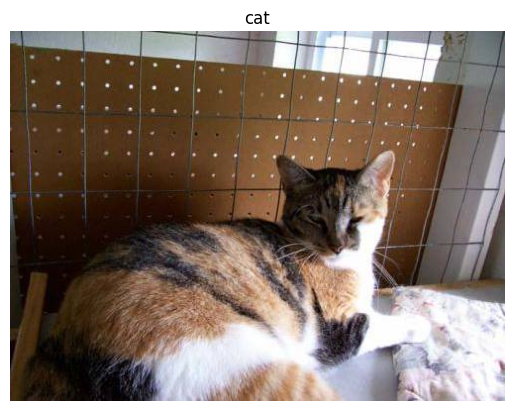

In [36]:
img = view_random_image(target_dir = '/content/cat_dog_split/train/',
                        target_class = "cat")


In [37]:
img

array([[[105, 116, 118],
        [105, 116, 118],
        [101, 112, 114],
        ...,
        [ 84,  87,  92],
        [ 61,  64,  69],
        [ 51,  54,  59]],

       [[104, 115, 117],
        [105, 116, 118],
        [103, 114, 116],
        ...,
        [ 78,  83,  87],
        [ 56,  61,  65],
        [ 50,  55,  59]],

       [[101, 115, 116],
        [104, 118, 119],
        [104, 118, 119],
        ...,
        [ 68,  78,  80],
        [ 49,  59,  61],
        [ 50,  60,  62]],

       ...,

       [[ 66,  41,  19],
        [ 65,  40,  18],
        [ 63,  41,  17],
        ...,
        [171, 173, 196],
        [179, 181, 204],
        [184, 186, 209]],

       [[ 67,  42,  20],
        [ 66,  41,  19],
        [ 63,  41,  17],
        ...,
        [168, 172, 197],
        [177, 181, 206],
        [184, 188, 213]],

       [[ 67,  42,  20],
        [ 66,  41,  19],
        [ 64,  42,  18],
        ...,
        [170, 176, 200],
        [179, 185, 209],
        [187, 193, 217]]

In [38]:
img/255

array([[[0.41176471, 0.45490196, 0.4627451 ],
        [0.41176471, 0.45490196, 0.4627451 ],
        [0.39607843, 0.43921569, 0.44705882],
        ...,
        [0.32941176, 0.34117647, 0.36078431],
        [0.23921569, 0.25098039, 0.27058824],
        [0.2       , 0.21176471, 0.23137255]],

       [[0.40784314, 0.45098039, 0.45882353],
        [0.41176471, 0.45490196, 0.4627451 ],
        [0.40392157, 0.44705882, 0.45490196],
        ...,
        [0.30588235, 0.3254902 , 0.34117647],
        [0.21960784, 0.23921569, 0.25490196],
        [0.19607843, 0.21568627, 0.23137255]],

       [[0.39607843, 0.45098039, 0.45490196],
        [0.40784314, 0.4627451 , 0.46666667],
        [0.40784314, 0.4627451 , 0.46666667],
        ...,
        [0.26666667, 0.30588235, 0.31372549],
        [0.19215686, 0.23137255, 0.23921569],
        [0.19607843, 0.23529412, 0.24313725]],

       ...,

       [[0.25882353, 0.16078431, 0.0745098 ],
        [0.25490196, 0.15686275, 0.07058824],
        [0.24705882, 0

In [39]:
# define training and testing directory paths

train_dir = '/content/cat_dog_split/train'
test_dir = '/content/cat_dog_split/test'

In [40]:
# rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
# turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (256, 256),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (256, 256),
                                               class_mode = 'binary',
                                               seed = 42)

Found 17635 images belonging to 2 classes.
Found 4410 images belonging to 2 classes.


In [42]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [43]:
images.shape

(32, 256, 256, 3)

In [118]:
# helper function
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))




  plt.figure(figsize = (8,4))
  plt.subplot(1,2,1)

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)


  # Plot accuracy
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

#Model 0: Baseline Model

In [44]:
model_0 = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           strides = 1,
                           padding = "valid",
                           activation = 'relu',
                           input_shape = (256, 256, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),


    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [46]:
# model compile

model_0.compile(loss = 'binary_crossentropy',
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ['accuracy'])

In [48]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 10)      910       
                                                                 
 flatten (Flatten)           (None, 625000)            0         
                                                                 
 dense (Dense)               (None, 1)                 625001    
                                                                 
Total params: 627,101
Trainable params: 627,101
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Fit the model

history_model_0 = model_0.fit(train_data,
                              epochs = 5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))


Epoch 1/5
552/552 [==============================] - 81s 123ms/step - loss: 0.6588 - accuracy: 0.6375 - val_loss: 0.5797 - val_accuracy: 0.6977
Epoch 2/5
552/552 [==============================] - 64s 117ms/step - loss: 0.4493 - accuracy: 0.7899 - val_loss: 0.5717 - val_accuracy: 0.7091
Epoch 3/5
552/552 [==============================] - 63s 114ms/step - loss: 0.1811 - accuracy: 0.9310 - val_loss: 0.7529 - val_accuracy: 0.6964
Epoch 4/5
552/552 [==============================] - 61s 111ms/step - loss: 0.0503 - accuracy: 0.9865 - val_loss: 1.3023 - val_accuracy: 0.6868
Epoch 5/5
552/552 [==============================] - 62s 112ms/step - loss: 0.0242 - accuracy: 0.9944 - val_loss: 1.4252 - val_accuracy: 0.6898


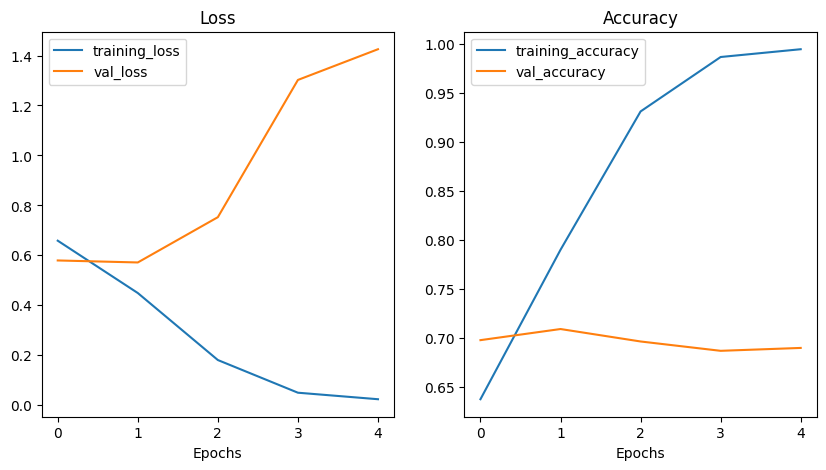

In [112]:
# visualize the history of trained model

plot_loss_curves(history_model_0)

**Try to improve our model by experimenting on different parameters**

#Model 1: Increase Number of layers

In [59]:
# build a model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 30,
                           kernel_size = 3,
                           strides = 1,
                           padding = "valid",
                           activation = 'relu',
                           input_shape = (256, 256, 3)),
    tf.keras.layers.Conv2D(30, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(30, 3, activation = 'relu'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# check model summary
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 30)      840       
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 30)      8130      
                                                                 
 conv2d_14 (Conv2D)          (None, 250, 250, 30)      8130      
                                                                 
 flatten_5 (Flatten)         (None, 1875000)           0         
                                                                 
 dense_17 (Dense)            (None, 100)               187500100 
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)              

In [60]:
# Fit the model
history_model_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
552/552 [==============================] - 111s 189ms/step - loss: 0.6780 - accuracy: 0.6515 - val_loss: 0.5388 - val_accuracy: 0.7351
Epoch 2/5
552/552 [==============================] - 98s 177ms/step - loss: 0.3995 - accuracy: 0.8248 - val_loss: 0.5850 - val_accuracy: 0.7277
Epoch 3/5
552/552 [==============================] - 98s 178ms/step - loss: 0.0680 - accuracy: 0.9753 - val_loss: 1.2149 - val_accuracy: 0.7116
Epoch 4/5
552/552 [==============================] - 97s 176ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 1.5986 - val_accuracy: 0.7098
Epoch 5/5
552/552 [==============================] - 99s 178ms/step - loss: 0.0235 - accuracy: 0.9935 - val_loss: 1.5732 - val_accuracy: 0.7032


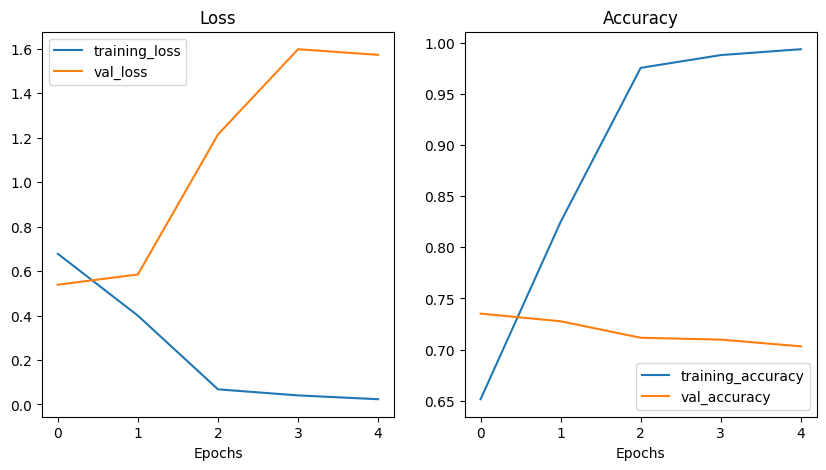

In [113]:
plot_loss_curves(history_model_1)

#Model 2: Using MaxPool2D(same as baseline but with Maxpooling)

In [62]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile a model

model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



In [63]:
# compile the model
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 10)     0         
 )                                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 10)      

In [64]:
# fit the model
history_model_2 = model_2.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = valid_data,
                              validation_steps = len(valid_data))

Epoch 1/5
552/552 [==============================] - 73s 127ms/step - loss: 0.6443 - accuracy: 0.6099 - val_loss: 0.6188 - val_accuracy: 0.6590
Epoch 2/5
552/552 [==============================] - 61s 111ms/step - loss: 0.5596 - accuracy: 0.7113 - val_loss: 0.5338 - val_accuracy: 0.7247
Epoch 3/5
552/552 [==============================] - 63s 114ms/step - loss: 0.4966 - accuracy: 0.7575 - val_loss: 0.5050 - val_accuracy: 0.7565
Epoch 4/5
552/552 [==============================] - 70s 127ms/step - loss: 0.4588 - accuracy: 0.7846 - val_loss: 0.5204 - val_accuracy: 0.7542
Epoch 5/5
552/552 [==============================] - 60s 108ms/step - loss: 0.4334 - accuracy: 0.7976 - val_loss: 0.5203 - val_accuracy: 0.7465


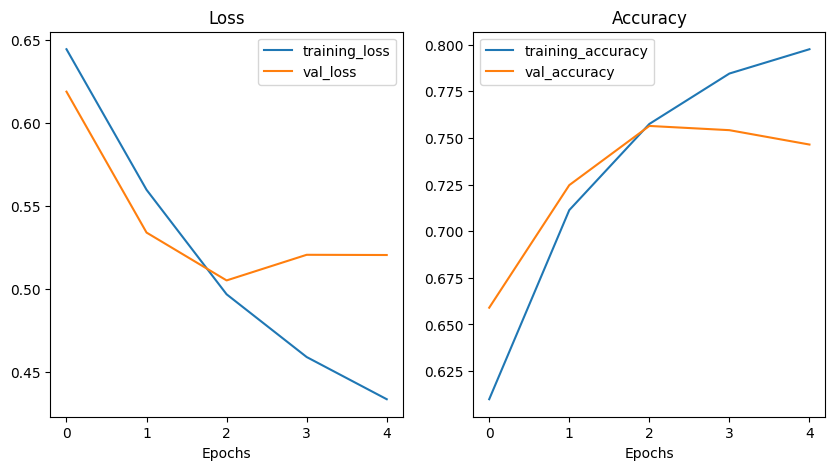

In [114]:
# visualize the history plot
plot_loss_curves(history_model_2)

Till this model we can see that model_2 is performing best on valid data than baseline but it is worse with training data

**Try to prevent overfitting with data Augmentation**

#Model 3: Data Augmentation

In [95]:
# create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 20,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          horizontal_flip = True)

# without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)


# test instances without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [96]:
# Augment the data

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (256,256),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (256,256),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (256,256),
                                               batch_size = 32,
                                               class_mode = 'binary'
                                               )

Found 17635 images belonging to 2 classes.
Found 17635 images belonging to 2 classes.
Found 4410 images belonging to 2 classes.


(-0.5, 255.5, 255.5, -0.5)

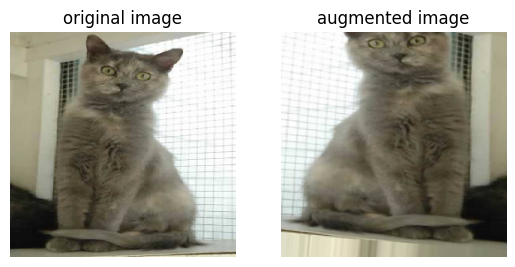

In [98]:
# visualize the data

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


random_number = random.randint(0, 32)

plt.figure()
plt.subplot(1,2,1)

plt.imshow(images[random_number])
plt.title('original image')
plt.axis(False)



plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title('augmented image')
plt.axis(False)

Build the same model as previous but train with augmented data

In [99]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile a model

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit a model

history_model_3 = model_3.fit(train_data_augmented,
                              epochs = 5,
                              steps_per_epoch = len(train_data_augmented),
                              validation_data = test_data,
                              validation_steps = len(test_data))

Epoch 1/5
552/552 [==============================] - 318s 573ms/step - loss: 0.6992 - accuracy: 0.5101 - val_loss: 0.6843 - val_accuracy: 0.6159
Epoch 2/5
552/552 [==============================] - 320s 580ms/step - loss: 0.6888 - accuracy: 0.5642 - val_loss: 0.6760 - val_accuracy: 0.6209
Epoch 3/5
552/552 [==============================] - 321s 581ms/step - loss: 0.6837 - accuracy: 0.5779 - val_loss: 0.6653 - val_accuracy: 0.6236
Epoch 4/5
552/552 [==============================] - 311s 564ms/step - loss: 0.6727 - accuracy: 0.6088 - val_loss: 0.6613 - val_accuracy: 0.6435
Epoch 5/5
552/552 [==============================] - 316s 572ms/step - loss: 0.6604 - accuracy: 0.6104 - val_loss: 0.6368 - val_accuracy: 0.6592


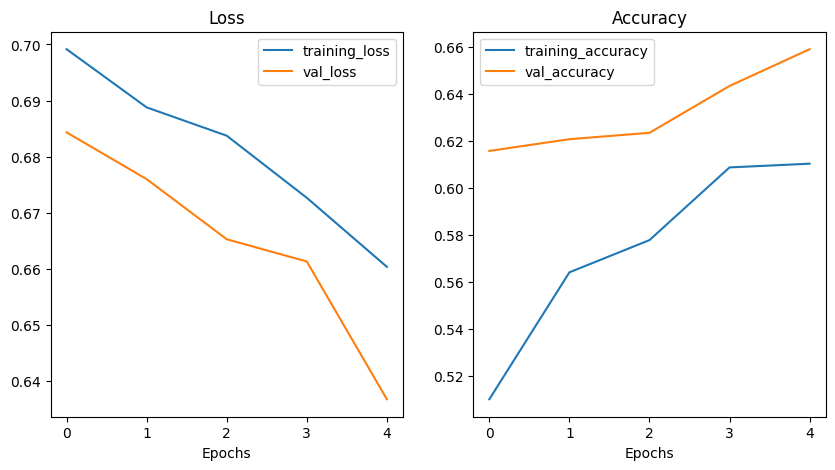

In [115]:
plot_loss_curves(history_model_3)

# Model 4: Data augmentation with shuffle data

In [116]:
# Augment the data

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (256,256),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = True)

Found 17635 images belonging to 2 classes.


In [117]:
# build same model as previous (model 3)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile a model

model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit a model

history_model_4 = model_4.fit(train_data_augmented,
                              epochs = 5,
                              steps_per_epoch = len(train_data_augmented),
                              validation_data = test_data,
                              validation_steps = len(test_data))

Epoch 1/5
552/552 [==============================] - 322s 580ms/step - loss: 0.6378 - accuracy: 0.6239 - val_loss: 0.6034 - val_accuracy: 0.6685
Epoch 2/5
552/552 [==============================] - 320s 580ms/step - loss: 0.5851 - accuracy: 0.6872 - val_loss: 0.5532 - val_accuracy: 0.7240
Epoch 3/5
552/552 [==============================] - 321s 582ms/step - loss: 0.5642 - accuracy: 0.7072 - val_loss: 0.5051 - val_accuracy: 0.7544
Epoch 4/5
552/552 [==============================] - 312s 565ms/step - loss: 0.5464 - accuracy: 0.7182 - val_loss: 0.5150 - val_accuracy: 0.7546
Epoch 5/5
552/552 [==============================] - 318s 576ms/step - loss: 0.5361 - accuracy: 0.7309 - val_loss: 0.4748 - val_accuracy: 0.7748


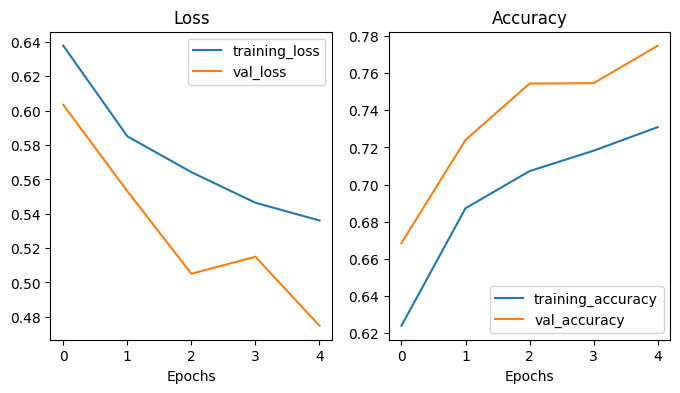

In [119]:
plot_loss_curves(history_model_4)

# Model 5: Hyperparameter tuninng

In [128]:
# CNN model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(20, 3, activation = 'relu',input_shape = (256,256,3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    # tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 254, 254, 20)      560       
                                                                 
 conv2d_36 (Conv2D)          (None, 252, 252, 10)      1810      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 126, 126, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 10)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 38440)           

In [129]:
# fit a model
history_model_5 = model_5.fit(train_data_augmented,
                              epochs = 6,
                              steps_per_epoch = len(train_data_augmented),
                              validation_data = test_data,
                              validation_steps = len(test_data))

Epoch 1/6
552/552 [==============================] - 336s 604ms/step - loss: 0.6471 - accuracy: 0.6052 - val_loss: 0.6006 - val_accuracy: 0.6615
Epoch 2/6
552/552 [==============================] - 330s 597ms/step - loss: 0.6066 - accuracy: 0.6591 - val_loss: 0.5650 - val_accuracy: 0.7027
Epoch 3/6
552/552 [==============================] - 333s 602ms/step - loss: 0.5846 - accuracy: 0.6839 - val_loss: 0.5752 - val_accuracy: 0.7190
Epoch 4/6
552/552 [==============================] - 329s 596ms/step - loss: 0.5676 - accuracy: 0.7002 - val_loss: 0.5266 - val_accuracy: 0.7435
Epoch 5/6
552/552 [==============================] - 338s 613ms/step - loss: 0.5596 - accuracy: 0.7134 - val_loss: 0.5311 - val_accuracy: 0.7329
Epoch 6/6
552/552 [==============================] - 344s 623ms/step - loss: 0.5466 - accuracy: 0.7190 - val_loss: 0.5046 - val_accuracy: 0.7558


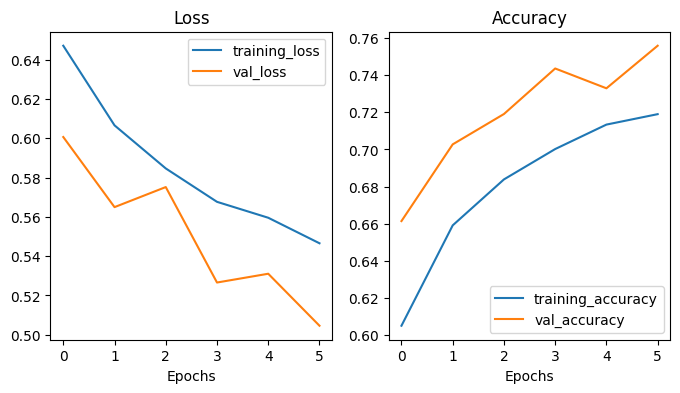

In [130]:
plot_loss_curves(history_model_5)

## Make predictions with our model having best performance

In [126]:
print(class_names)

['cat' 'dog']


(-0.5, 639.5, 441.5, -0.5)

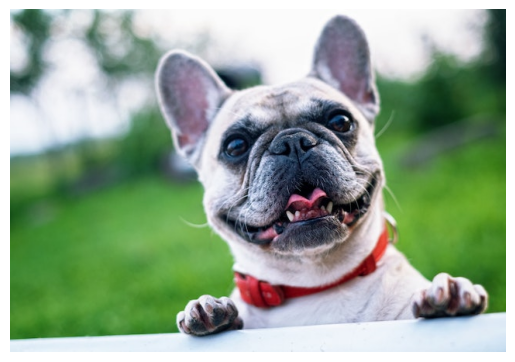

In [127]:
import matplotlib.pyplot as plt

dog = mpimg.imread('/content/test_images/pexels-pixabay-160846.jpg')
plt.imshow(dog)
plt.axis(False)

In [131]:
dog.shape

(442, 640, 3)

In [159]:
img = tf.io.read_file("/content/test_images/D_image_for_pred.jpg")

img = tf.image.decode_image(img, channels = 3)
img = tf.image.resize(img, [256,256])
img = img/255.

In [160]:
img

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.09667586, 0.13981311, 0.02216605],
        [0.08180147, 0.12101716, 0.02689951],
        [0.06807598, 0.1033701 , 0.03670343],
        ...,
        [0.10980392, 0.10196079, 0.05098039],
        [0.10588235, 0.09803922, 0.04705882],
        [0.09803922, 0.09019608, 0.03921569]],

       [[0.10733762, 0.15047488, 0.03282782],
        [0.09117647, 0.13039216, 0.03627451],
        [0.07745098, 0.1127451 , 0.04607843],
        ...,
        [0.09803922, 0.09019608, 0.03921569],
        [0.10588235, 0.09803922, 0.04705882],
        [0.09803922, 0.09019608, 0.03921569]],

       [[0.1248315 , 0.16796875, 0.05032169],
        [0.09915747, 0.13837317, 0.04425551],
        [0.07749694, 0.11279105, 0.04612439],
        ...,
        [0.10588235, 0.09803922, 0.04705882],
        [0.09803922, 0.09019608, 0.03921569],
        [0.08609068, 0.07824755, 0.02726716]],

       ...,

       [[0.68197   , 0.56450677, 0.28851104],
        [0.63

In [135]:
model_5.predict(img)

ValueError: ignored

In [161]:
img.shape

TensorShape([256, 256, 3])

In [162]:
img = tf.expand_dims(img, axis = 0)
img.shape

TensorShape([1, 256, 256, 3])

In [163]:
pred = model_4.predict(img)

1/1 [==============================] - 0s 21ms/step


In [164]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'dog'

In [169]:
# make function to add all above lines in one

def make_prediction(image, model):
  class_names = ['cat','dog']

  img = tf.io.read_file(image)

  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, [256,256])
  img = img/255.

  img_dim = tf.expand_dims(img, axis = 0)

  pred = model.predict(img_dim)

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)

  plt.title(pred_class)
  plt.axis(False)

1/1 [==============================] - 0s 22ms/step


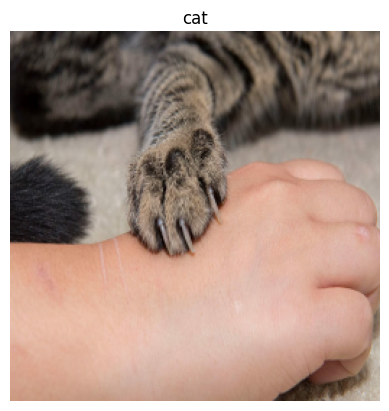

In [171]:
make_prediction("/content/test_images/Scratch-YKL-092920-770x553-1-690x455.jpg", model_4)

1/1 [==============================] - 0s 36ms/step


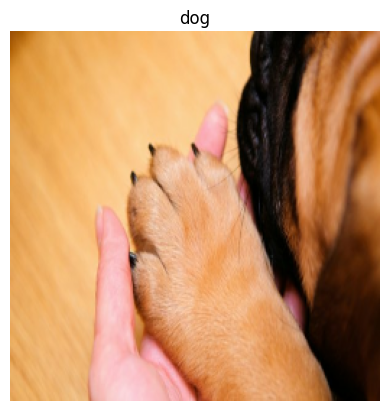

In [175]:
make_prediction("/content/test_images/main-qimg-bebb67c9799bd6160ec2611e4105e717-pjlq.jpg", model_5)